# Customer Segmentation Using K-Means Clustering
### By Bereket Takiso
---

This notebook demonstrates customer segmentation using K-Means clustering algorithm on the Mall Customers dataset. We will cluster customers based on their **Annual Income** and **Spending Score** using different values of K (3, 4, and 5).


## Step 1: Import Required Libraries


In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Display settings
pd.set_option('display.max_columns', None)
print("Libraries imported successfully!")


Libraries imported successfully!


## Step 2: Load the Dataset

The dataset is from Kaggle's Customer Segmentation Tutorial.
- **Dataset Source**: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


In [ ]:
# Load the dataset from GitHub
# Data Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

github_url = "https://raw.githubusercontent.com/btakiso/cybersecurity-intrusion-detection/main/Mall_Customers.csv"
df = pd.read_csv(github_url)
print("Data loaded successfully!")

# Display the first few rows to understand the data structure
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 10 rows of the dataset:")
df.head(10)


Data loaded successfully!
DATASET OVERVIEW

Dataset Shape: 200 rows, 5 columns

First 10 rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# Display all column names and data types
print("\nColumn Information:")
print("-" * 40)
print(df.dtypes)
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
df.describe()



Column Information:
----------------------------------------
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

STATISTICAL SUMMARY


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Step 3: Select the Two Required Columns

For this clustering exercise, we will use only two features:
1. **Annual Income (k$)** - The annual income of customers in thousands of dollars
2. **Spending Score (1-100)** - Score assigned by the mall based on customer behavior and spending nature


In [4]:
# Extract only the two columns needed for clustering
# Annual Income and Spending Score
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Rename columns for easier handling
data.columns = ['Annual_Income', 'Spending_Score']

# Display the selected data
print("Selected Features for Clustering:")
print("-" * 40)
print(data.head(10))

# Check for any missing values
print("\nMissing Values:")
print(data.isnull().sum())


Selected Features for Clustering:
----------------------------------------
   Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40
5             17              76
6             18               6
7             18              94
8             19               3
9             19              72

Missing Values:
Annual_Income     0
Spending_Score    0
dtype: int64


## Step 4: Visualize the Original Data

Before clustering, let's visualize the distribution of our two features to understand the data patterns.


C:\Users\btakiso\AppData\Local\Temp\ipykernel_43356\3948418485.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Value', data=data_melted, ax=axes[1, 1], palette=['coral', 'mediumseagreen'])


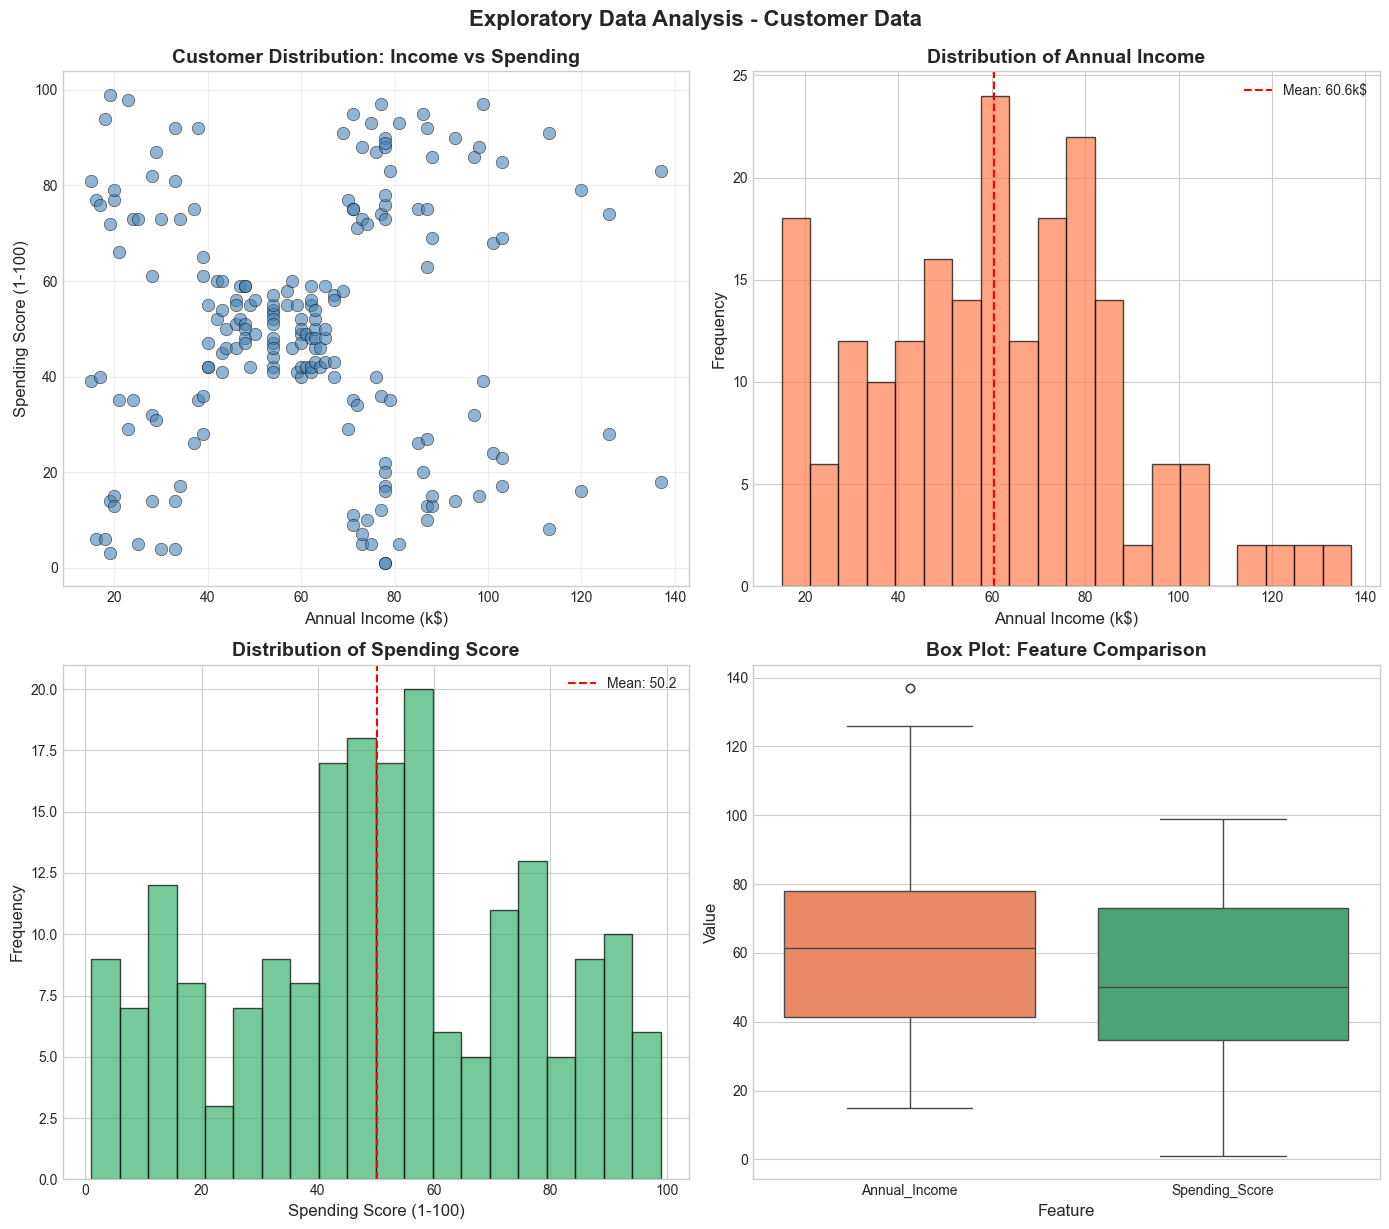


Data Statistics:
----------------------------------------
       Annual_Income  Spending_Score
count     200.000000      200.000000
mean       60.560000       50.200000
std        26.264721       25.823522
min        15.000000        1.000000
25%        41.500000       34.750000
50%        61.500000       50.000000
75%        78.000000       73.000000
max       137.000000       99.000000


In [5]:
# Create a comprehensive visualization of the original data
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Scatter plot of Annual Income vs Spending Score
axes[0, 0].scatter(data['Annual_Income'], data['Spending_Score'], 
                   c='steelblue', alpha=0.6, edgecolors='black', linewidth=0.5, s=80)
axes[0, 0].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0, 0].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[0, 0].set_title('Customer Distribution: Income vs Spending', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Distribution of Annual Income
axes[0, 1].hist(data['Annual_Income'], bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Annual Income', fontsize=14, fontweight='bold')
axes[0, 1].axvline(data['Annual_Income'].mean(), color='red', linestyle='--', label=f'Mean: {data["Annual_Income"].mean():.1f}k$')
axes[0, 1].legend()

# Plot 3: Distribution of Spending Score
axes[1, 0].hist(data['Spending_Score'], bins=20, color='mediumseagreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Spending Score (1-100)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Spending Score', fontsize=14, fontweight='bold')
axes[1, 0].axvline(data['Spending_Score'].mean(), color='red', linestyle='--', label=f'Mean: {data["Spending_Score"].mean():.1f}')
axes[1, 0].legend()

# Plot 4: Box plots for both features
data_melted = data.melt(var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', data=data_melted, ax=axes[1, 1], palette=['coral', 'mediumseagreen'])
axes[1, 1].set_title('Box Plot: Feature Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Feature', fontsize=12)
axes[1, 1].set_ylabel('Value', fontsize=12)

plt.tight_layout()
plt.suptitle('Exploratory Data Analysis - Customer Data', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\nData Statistics:")
print("-" * 40)
print(data.describe())


## Step 5: Normalize the Data

### WHY WE NORMALIZE THE DATA:

**Normalization (or Standardization) is crucial for K-Means clustering for the following reasons:**

1. **Scale Sensitivity**: K-Means uses Euclidean distance to measure similarity between data points. If features have different scales, the feature with the larger scale will dominate the distance calculation.

2. **Equal Feature Importance**: Without normalization, Annual Income would have more influence on cluster formation simply because its values are larger, not because it is more important.

3. **Fair Comparison**: Standardization transforms all features to have mean=0 and standard deviation=1, ensuring each feature contributes equally to the clustering process.

4. **Better Convergence**: Normalized data helps K-Means algorithm converge faster and more reliably to optimal cluster centers.


In [6]:
# Initialize the StandardScaler for normalization
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler to our data and transform it
data_normalized = scaler.fit_transform(data)

# Convert back to DataFrame for easier handling
data_normalized_df = pd.DataFrame(data_normalized, columns=['Annual_Income_Scaled', 'Spending_Score_Scaled'])

# Display comparison of original vs normalized data
print("=" * 70)
print("COMPARISON: ORIGINAL DATA vs NORMALIZED DATA")
print("=" * 70)

print("\nOriginal Data Statistics:")
print("-" * 35)
print(data.describe().round(2))

print("\nNormalized Data Statistics:")
print("-" * 35)
print(data_normalized_df.describe().round(4))

print("\n" + "=" * 70)
print("Notice: After normalization, both features have:")
print("  - Mean approximately 0")
print("  - Standard Deviation approximately 1")
print("This ensures equal contribution to the clustering algorithm.")
print("=" * 70)


COMPARISON: ORIGINAL DATA vs NORMALIZED DATA

Original Data Statistics:
-----------------------------------
       Annual_Income  Spending_Score
count         200.00          200.00
mean           60.56           50.20
std            26.26           25.82
min            15.00            1.00
25%            41.50           34.75
50%            61.50           50.00
75%            78.00           73.00
max           137.00           99.00

Normalized Data Statistics:
-----------------------------------
       Annual_Income_Scaled  Spending_Score_Scaled
count              200.0000               200.0000
mean                -0.0000                -0.0000
std                  1.0025                 1.0025
min                 -1.7390                -1.9100
25%                 -0.7275                -0.5998
50%                  0.0359                -0.0078
75%                  0.6657                 0.8851
max                  2.9177                 1.8945

Notice: After normalization, both 

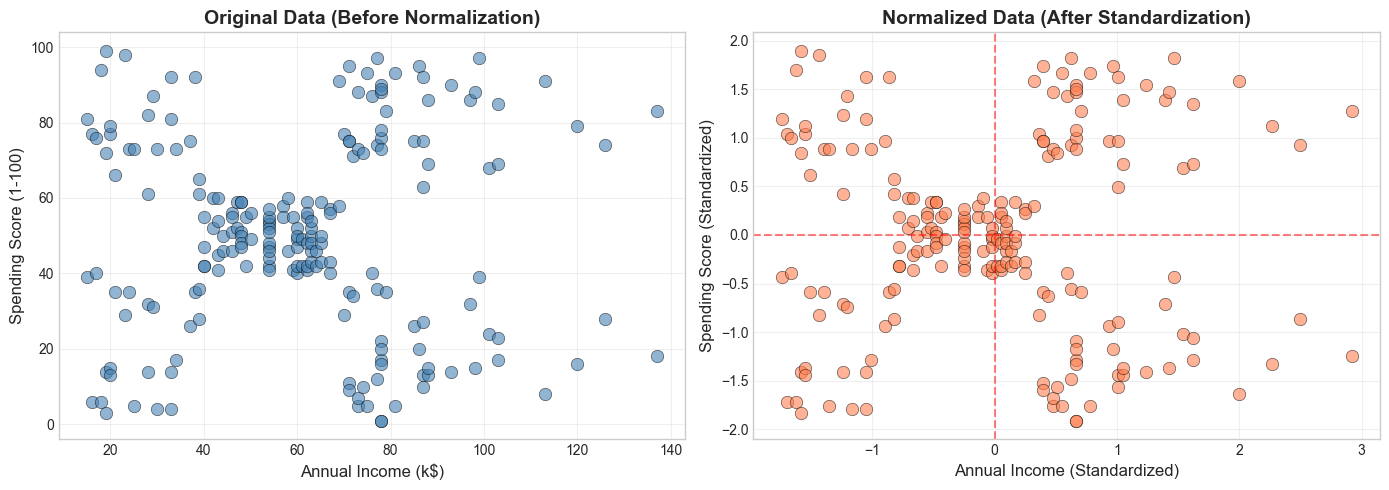

In [7]:
# Visualize the normalized data comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original data scatter plot
axes[0].scatter(data['Annual_Income'], data['Spending_Score'], 
                c='steelblue', alpha=0.6, edgecolors='black', linewidth=0.5, s=80)
axes[0].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[0].set_title('Original Data (Before Normalization)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Normalized data scatter plot
axes[1].scatter(data_normalized_df['Annual_Income_Scaled'], data_normalized_df['Spending_Score_Scaled'], 
                c='coral', alpha=0.6, edgecolors='black', linewidth=0.5, s=80)
axes[1].set_xlabel('Annual Income (Standardized)', fontsize=12)
axes[1].set_ylabel('Spending Score (Standardized)', fontsize=12)
axes[1].set_title('Normalized Data (After Standardization)', fontsize=14, fontweight='bold')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 6: K-Means Clustering with K=3

First, we will apply K-Means clustering with 3 clusters.


In [8]:
# Apply K-Means clustering with K=3
# n_clusters=3 specifies we want 3 clusters
# random_state ensures reproducibility
# n_init specifies number of times algorithm runs with different centroid seeds

kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model to normalized data and predict cluster labels
clusters_3 = kmeans_3.fit_predict(data_normalized)

# Add cluster labels to original data
data_with_clusters_3 = data.copy()
data_with_clusters_3['Cluster'] = clusters_3

# Display clustering results
print("=" * 60)
print("K-MEANS CLUSTERING RESULTS (K=3)")
print("=" * 60)
print(f"\nNumber of clusters: 3")
print(f"Inertia (WSS): {kmeans_3.inertia_:.2f}")
print("\nCluster Distribution:")
print(data_with_clusters_3['Cluster'].value_counts().sort_index())

# Display cluster centers (in original scale)
centers_3 = scaler.inverse_transform(kmeans_3.cluster_centers_)
print("\nCluster Centers (Original Scale):")
print("-" * 45)
for i, center in enumerate(centers_3):
    print(f"  Cluster {i}: Annual Income = ${center[0]:.1f}k, Spending Score = {center[1]:.1f}")


C:\Users\btakiso\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\btakiso\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\btakiso\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\btakiso\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\btakiso\anaconda3\Lib\subprocess.py", line 1538, in _execut

K-MEANS CLUSTERING RESULTS (K=3)

Number of clusters: 3
Inertia (WSS): 157.70

Cluster Distribution:
Cluster
0     38
1     39
2    123
Name: count, dtype: int64

Cluster Centers (Original Scale):
---------------------------------------------
  Cluster 0: Annual Income = $87.0k, Spending Score = 18.6
  Cluster 1: Annual Income = $86.5k, Spending Score = 82.1
  Cluster 2: Annual Income = $44.2k, Spending Score = 49.8


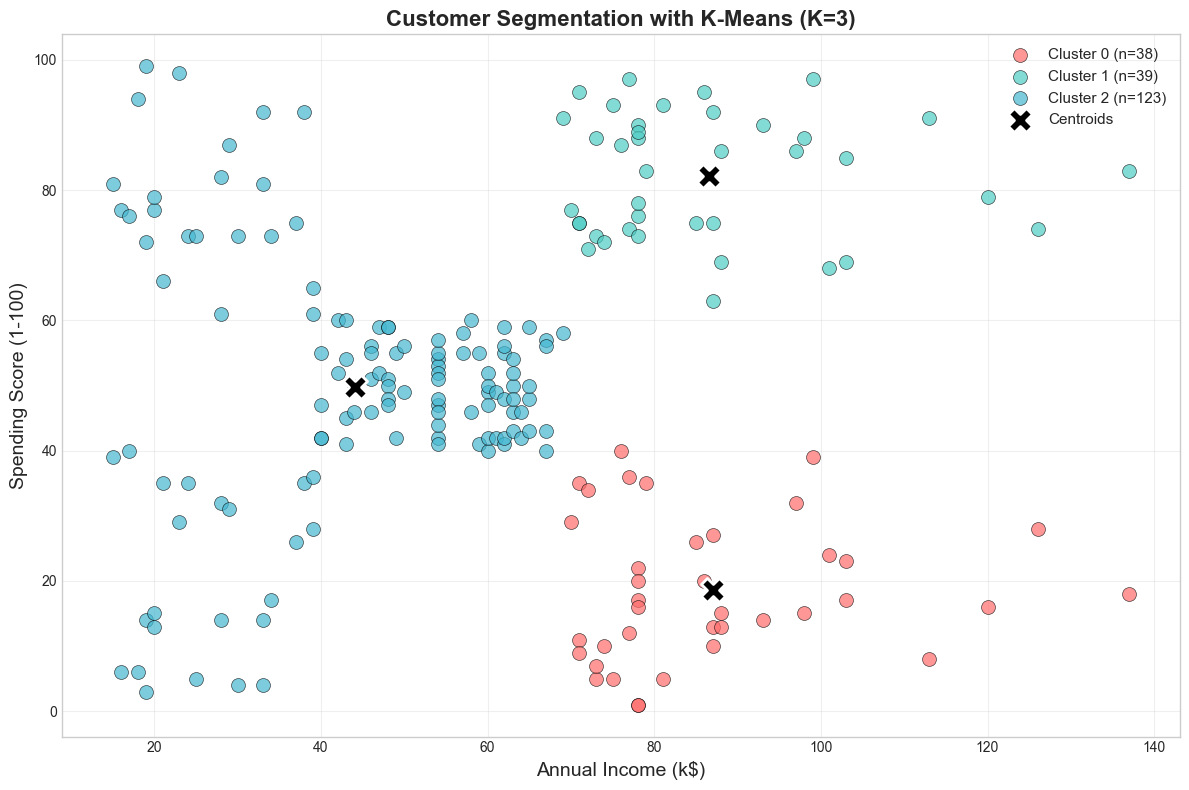


Cluster Statistics (K=3):
        Annual_Income                Spending_Score        
                 mean min  max count           mean min max
Cluster                                                    
0               87.00  70  137    38          18.63   1  40
1               86.54  69  137    39          82.13  63  97
2               44.15  15   69   123          49.83   3  99


In [9]:
# Visualize K=3 clusters
plt.figure(figsize=(12, 8))

# Define colors for clusters
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Plot each cluster
for i in range(3):
    cluster_data = data_with_clusters_3[data_with_clusters_3['Cluster'] == i]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                c=colors[i], label=f'Cluster {i} (n={len(cluster_data)})', 
                s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Plot cluster centers
plt.scatter(centers_3[:, 0], centers_3[:, 1], 
            c='black', marker='X', s=300, label='Centroids', edgecolors='white', linewidth=2)

plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Customer Segmentation with K-Means (K=3)', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display cluster statistics
print("\nCluster Statistics (K=3):")
print("=" * 60)
print(data_with_clusters_3.groupby('Cluster').agg({
    'Annual_Income': ['mean', 'min', 'max', 'count'],
    'Spending_Score': ['mean', 'min', 'max']
}).round(2))


## Step 7: K-Means Clustering with K=4

Now, let us apply K-Means clustering with 4 clusters.


In [10]:
# Apply K-Means clustering with K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the model to normalized data and predict cluster labels
clusters_4 = kmeans_4.fit_predict(data_normalized)

# Add cluster labels to original data
data_with_clusters_4 = data.copy()
data_with_clusters_4['Cluster'] = clusters_4

# Display clustering results
print("=" * 60)
print("K-MEANS CLUSTERING RESULTS (K=4)")
print("=" * 60)
print(f"\nNumber of clusters: 4")
print(f"Inertia (WSS): {kmeans_4.inertia_:.2f}")
print("\nCluster Distribution:")
print(data_with_clusters_4['Cluster'].value_counts().sort_index())

# Display cluster centers (in original scale)
centers_4 = scaler.inverse_transform(kmeans_4.cluster_centers_)
print("\nCluster Centers (Original Scale):")
print("-" * 45)
for i, center in enumerate(centers_4):
    print(f"  Cluster {i}: Annual Income = ${center[0]:.1f}k, Spending Score = {center[1]:.1f}")


K-MEANS CLUSTERING RESULTS (K=4)

Number of clusters: 4
Inertia (WSS): 108.92

Cluster Distribution:
Cluster
0     23
1     38
2    100
3     39
Name: count, dtype: int64

Cluster Centers (Original Scale):
---------------------------------------------
  Cluster 0: Annual Income = $26.3k, Spending Score = 20.9
  Cluster 1: Annual Income = $87.0k, Spending Score = 18.6
  Cluster 2: Annual Income = $48.3k, Spending Score = 56.5
  Cluster 3: Annual Income = $86.5k, Spending Score = 82.1


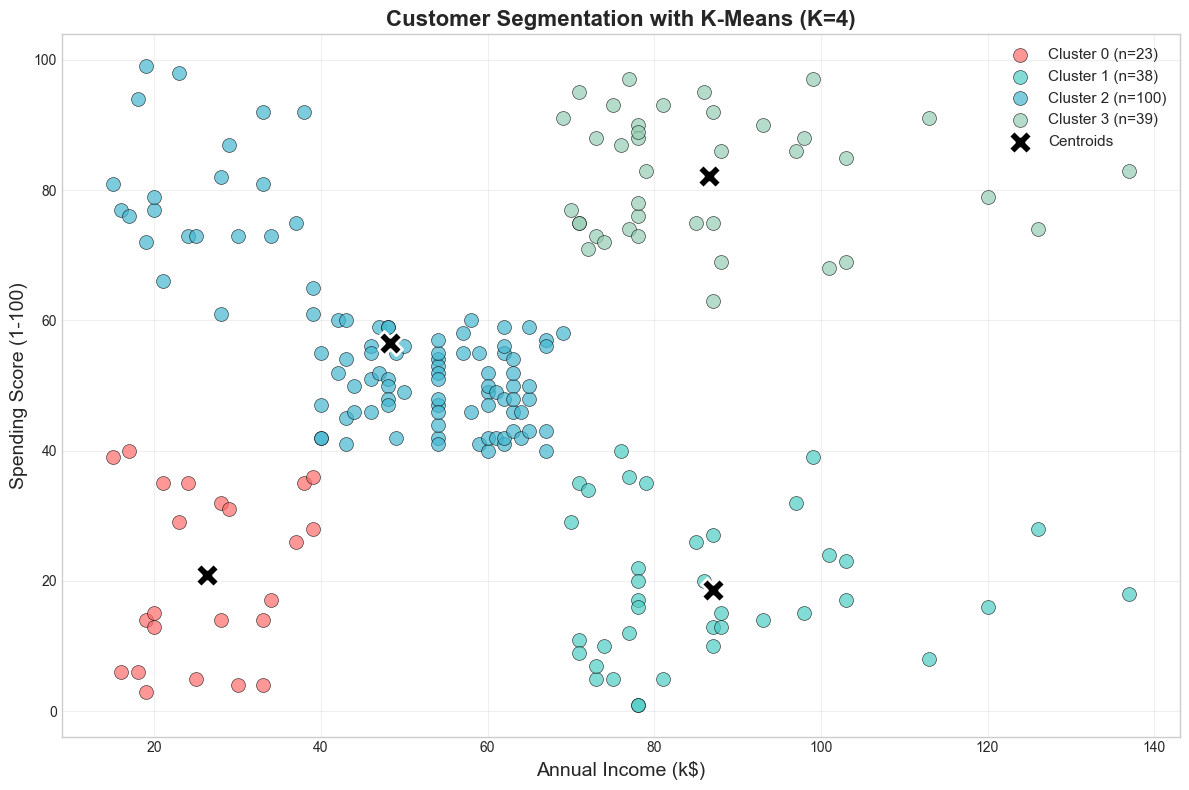


Cluster Statistics (K=4):
        Annual_Income                Spending_Score        
                 mean min  max count           mean min max
Cluster                                                    
0               26.30  15   39    23          20.91   3  40
1               87.00  70  137    38          18.63   1  40
2               48.26  15   69   100          56.48  40  99
3               86.54  69  137    39          82.13  63  97


In [11]:
# Visualize K=4 clusters
plt.figure(figsize=(12, 8))

# Define colors for clusters
colors_4 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Plot each cluster
for i in range(4):
    cluster_data = data_with_clusters_4[data_with_clusters_4['Cluster'] == i]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                c=colors_4[i], label=f'Cluster {i} (n={len(cluster_data)})', 
                s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Plot cluster centers
plt.scatter(centers_4[:, 0], centers_4[:, 1], 
            c='black', marker='X', s=300, label='Centroids', edgecolors='white', linewidth=2)

plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Customer Segmentation with K-Means (K=4)', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display cluster statistics
print("\nCluster Statistics (K=4):")
print("=" * 60)
print(data_with_clusters_4.groupby('Cluster').agg({
    'Annual_Income': ['mean', 'min', 'max', 'count'],
    'Spending_Score': ['mean', 'min', 'max']
}).round(2))


## Step 8: K-Means Clustering with K=5

Finally, let us apply K-Means clustering with 5 clusters.


In [12]:
# Apply K-Means clustering with K=5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit the model to normalized data and predict cluster labels
clusters_5 = kmeans_5.fit_predict(data_normalized)

# Add cluster labels to original data
data_with_clusters_5 = data.copy()
data_with_clusters_5['Cluster'] = clusters_5

# Display clustering results
print("=" * 60)
print("K-MEANS CLUSTERING RESULTS (K=5)")
print("=" * 60)
print(f"\nNumber of clusters: 5")
print(f"Inertia (WSS): {kmeans_5.inertia_:.2f}")
print("\nCluster Distribution:")
print(data_with_clusters_5['Cluster'].value_counts().sort_index())

# Display cluster centers (in original scale)
centers_5 = scaler.inverse_transform(kmeans_5.cluster_centers_)
print("\nCluster Centers (Original Scale):")
print("-" * 45)
for i, center in enumerate(centers_5):
    print(f"  Cluster {i}: Annual Income = ${center[0]:.1f}k, Spending Score = {center[1]:.1f}")


K-MEANS CLUSTERING RESULTS (K=5)

Number of clusters: 5
Inertia (WSS): 65.57

Cluster Distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Cluster Centers (Original Scale):
---------------------------------------------
  Cluster 0: Annual Income = $55.3k, Spending Score = 49.5
  Cluster 1: Annual Income = $86.5k, Spending Score = 82.1
  Cluster 2: Annual Income = $25.7k, Spending Score = 79.4
  Cluster 3: Annual Income = $88.2k, Spending Score = 17.1
  Cluster 4: Annual Income = $26.3k, Spending Score = 20.9


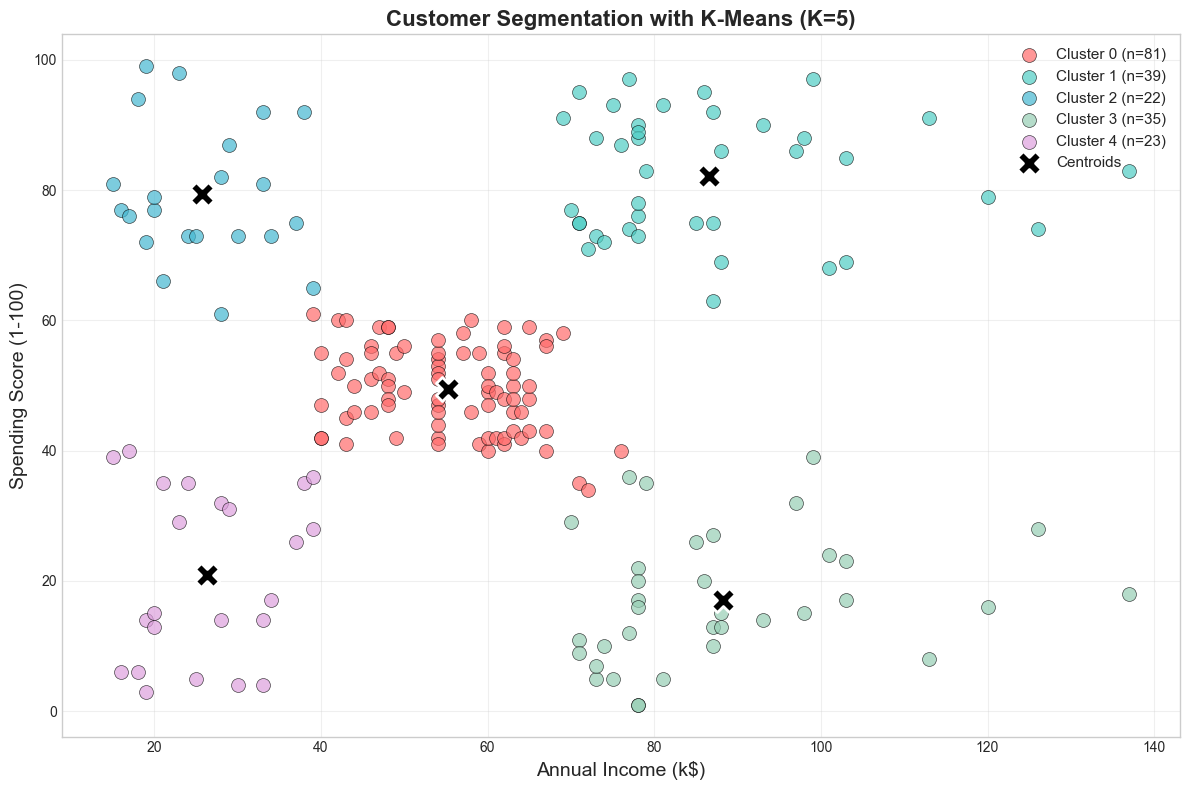


Cluster Statistics (K=5):
        Annual_Income                Spending_Score        
                 mean min  max count           mean min max
Cluster                                                    
0               55.30  39   76    81          49.52  34  61
1               86.54  69  137    39          82.13  63  97
2               25.73  15   39    22          79.36  61  99
3               88.20  70  137    35          17.11   1  39
4               26.30  15   39    23          20.91   3  40


In [13]:
# Visualize K=5 clusters
plt.figure(figsize=(12, 8))

# Define colors for clusters
colors_5 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#DDA0DD']

# Plot each cluster
for i in range(5):
    cluster_data = data_with_clusters_5[data_with_clusters_5['Cluster'] == i]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                c=colors_5[i], label=f'Cluster {i} (n={len(cluster_data)})', 
                s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Plot cluster centers
plt.scatter(centers_5[:, 0], centers_5[:, 1], 
            c='black', marker='X', s=300, label='Centroids', edgecolors='white', linewidth=2)

plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Customer Segmentation with K-Means (K=5)', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display cluster statistics
print("\nCluster Statistics (K=5):")
print("=" * 60)
print(data_with_clusters_5.groupby('Cluster').agg({
    'Annual_Income': ['mean', 'min', 'max', 'count'],
    'Spending_Score': ['mean', 'min', 'max']
}).round(2))


## Step 9: Comparison of All K Values


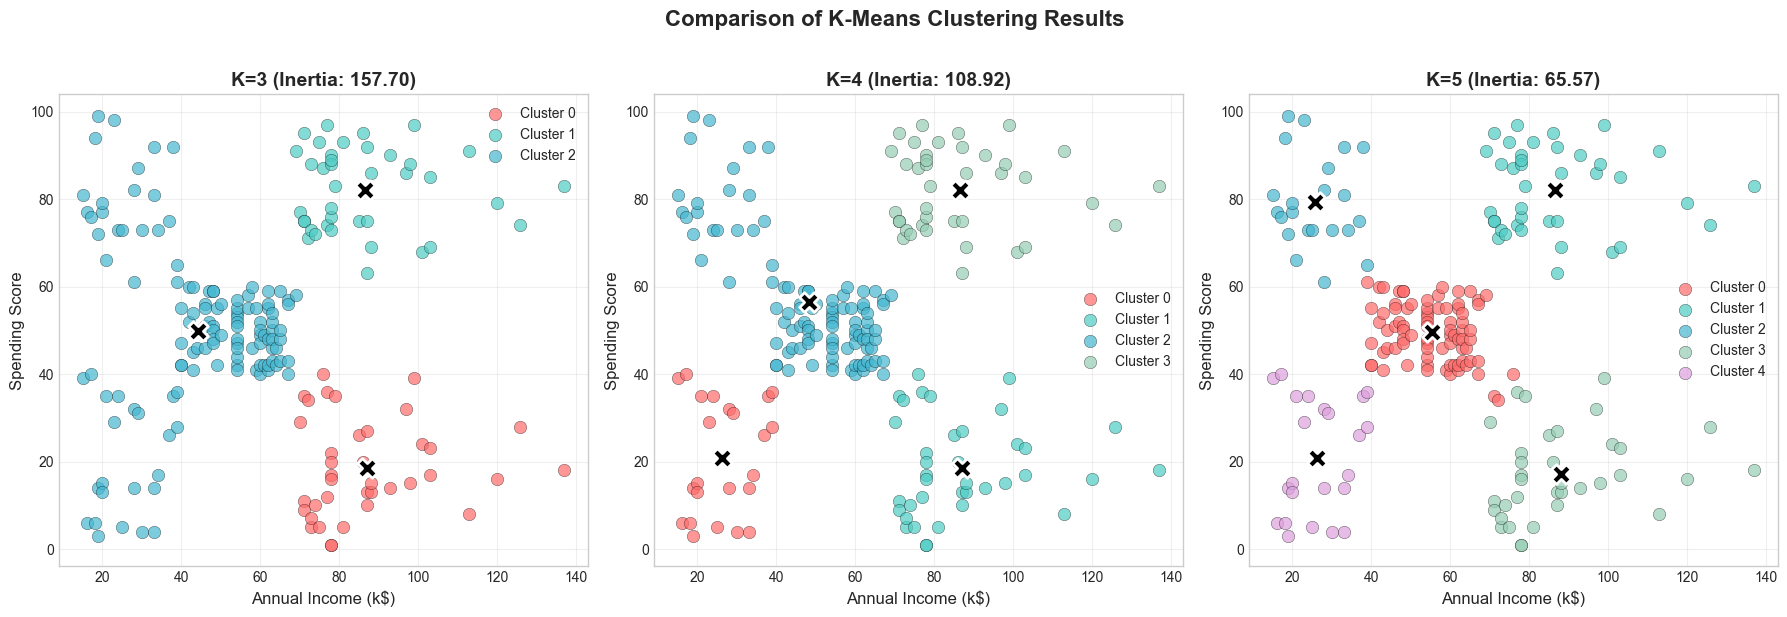


INERTIA (WSS) COMPARISON
K=3: 157.70
K=4: 108.92
K=5: 65.57

Note: Lower inertia indicates tighter clusters.


In [14]:
# Create a side-by-side comparison of all three clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K=3 plot
for i in range(3):
    cluster_data = data_with_clusters_3[data_with_clusters_3['Cluster'] == i]
    axes[0].scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                    c=colors[i], label=f'Cluster {i}', s=80, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[0].scatter(centers_3[:, 0], centers_3[:, 1], c='black', marker='X', s=200, edgecolors='white', linewidth=2)
axes[0].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0].set_ylabel('Spending Score', fontsize=12)
axes[0].set_title(f'K=3 (Inertia: {kmeans_3.inertia_:.2f})', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# K=4 plot
for i in range(4):
    cluster_data = data_with_clusters_4[data_with_clusters_4['Cluster'] == i]
    axes[1].scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                    c=colors_4[i], label=f'Cluster {i}', s=80, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[1].scatter(centers_4[:, 0], centers_4[:, 1], c='black', marker='X', s=200, edgecolors='white', linewidth=2)
axes[1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[1].set_ylabel('Spending Score', fontsize=12)
axes[1].set_title(f'K=4 (Inertia: {kmeans_4.inertia_:.2f})', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# K=5 plot
for i in range(5):
    cluster_data = data_with_clusters_5[data_with_clusters_5['Cluster'] == i]
    axes[2].scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                    c=colors_5[i], label=f'Cluster {i}', s=80, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[2].scatter(centers_5[:, 0], centers_5[:, 1], c='black', marker='X', s=200, edgecolors='white', linewidth=2)
axes[2].set_xlabel('Annual Income (k$)', fontsize=12)
axes[2].set_ylabel('Spending Score', fontsize=12)
axes[2].set_title(f'K=5 (Inertia: {kmeans_5.inertia_:.2f})', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('Comparison of K-Means Clustering Results', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print inertia comparison
print("\n" + "=" * 60)
print("INERTIA (WSS) COMPARISON")
print("=" * 60)
print(f"K=3: {kmeans_3.inertia_:.2f}")
print(f"K=4: {kmeans_4.inertia_:.2f}")
print(f"K=5: {kmeans_5.inertia_:.2f}")
print("\nNote: Lower inertia indicates tighter clusters.")


## Step 10: Best K Selection and Cluster Description

### CHOSEN VALUE: K = 5

**Why K=5 is the best choice for this dataset:**

1. **Clear Visual Separation**: K=5 creates distinct, well-separated customer groups that are easily identifiable in the scatter plot.

2. **Meaningful Business Segments**: The 5 clusters represent logical customer segments that a business can target differently.

3. **Lower Inertia**: K=5 has the lowest inertia value, indicating the clusters are tighter and more compact.

4. **Aligns with Natural Data Structure**: Looking at the scatter plot, the data naturally forms about 5 distinct groups.


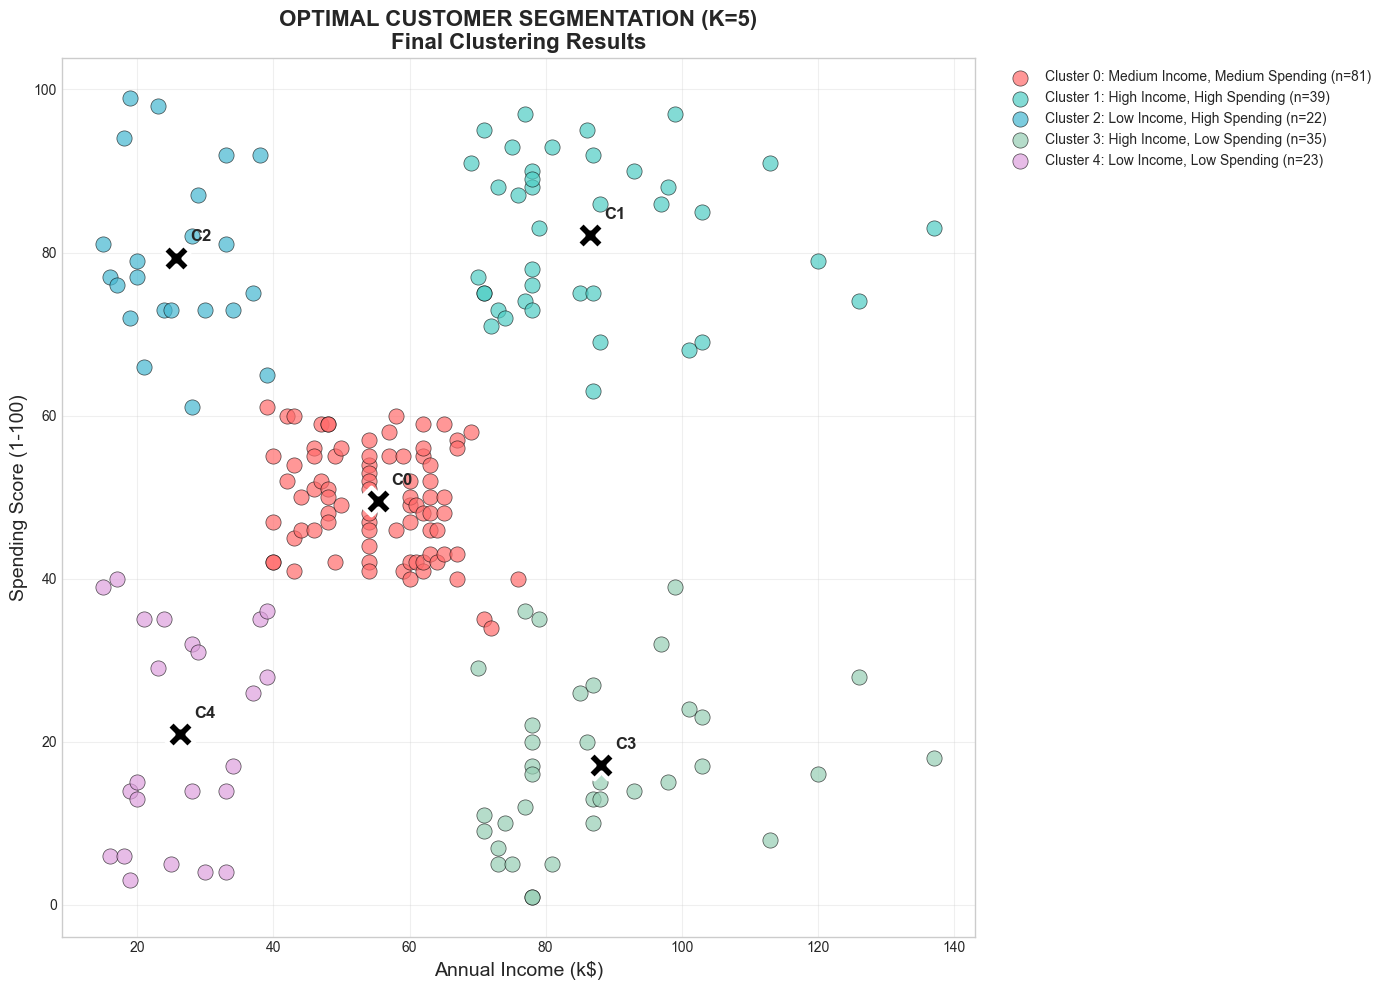

In [15]:
# Final visualization of K=5 with detailed cluster descriptions
# This is the chosen optimal clustering result

plt.figure(figsize=(14, 10))

# Calculate cluster statistics for labeling
cluster_stats_5 = data_with_clusters_5.groupby('Cluster').agg({
    'Annual_Income': 'mean',
    'Spending_Score': 'mean'
}).round(1)

# Create descriptive labels based on the cluster centers
def get_cluster_label(income_mean, spending_mean):
    income_label = "High Income" if income_mean > 70 else ("Low Income" if income_mean < 40 else "Medium Income")
    spending_label = "High Spending" if spending_mean > 60 else ("Low Spending" if spending_mean < 40 else "Medium Spending")
    return f"{income_label}, {spending_label}"

cluster_labels = {}
for cluster in range(5):
    income = cluster_stats_5.loc[cluster, 'Annual_Income']
    spending = cluster_stats_5.loc[cluster, 'Spending_Score']
    cluster_labels[cluster] = get_cluster_label(income, spending)

# Plot each cluster with descriptive labels
for i in range(5):
    cluster_data = data_with_clusters_5[data_with_clusters_5['Cluster'] == i]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                c=colors_5[i], 
                label=f'Cluster {i}: {cluster_labels[i]} (n={len(cluster_data)})', 
                s=120, alpha=0.7, edgecolors='black', linewidth=0.5)

# Plot cluster centers with labels
for i, center in enumerate(centers_5):
    plt.scatter(center[0], center[1], c='black', marker='X', s=400, edgecolors='white', linewidth=3, zorder=5)
    plt.annotate(f'C{i}', (center[0]+2, center[1]+2), fontsize=12, fontweight='bold')

plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('OPTIMAL CUSTOMER SEGMENTATION (K=5)\nFinal Clustering Results', fontsize=16, fontweight='bold')
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1.02, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:
# Detailed cluster analysis and descriptions
print("=" * 80)
print("DETAILED CLUSTER ANALYSIS (K=5)")
print("=" * 80)

for cluster in range(5):
    cluster_data = data_with_clusters_5[data_with_clusters_5['Cluster'] == cluster]
    income_mean = cluster_data['Annual_Income'].mean()
    spending_mean = cluster_data['Spending_Score'].mean()
    
    print(f"\n{'-' * 80}")
    print(f"CLUSTER {cluster}: {cluster_labels[cluster].upper()}")
    print(f"{'-' * 80}")
    print(f"  Number of Customers: {len(cluster_data)}")
    print(f"  Average Annual Income: ${income_mean:.1f}k")
    print(f"  Average Spending Score: {spending_mean:.1f}")
    print(f"  Income Range: ${cluster_data['Annual_Income'].min()}k - ${cluster_data['Annual_Income'].max()}k")
    print(f"  Spending Range: {cluster_data['Spending_Score'].min()} - {cluster_data['Spending_Score'].max()}")
    
    # Provide business interpretation
    if income_mean > 70 and spending_mean > 60:
        print("  Profile: PREMIUM CUSTOMERS - High earners who spend generously")
        print("  Strategy: VIP treatment, exclusive offers, loyalty rewards")
    elif income_mean > 70 and spending_mean < 40:
        print("  Profile: CAREFUL HIGH-EARNERS - High income but conservative spenders")
        print("  Strategy: Targeted marketing, quality over quantity promotions")
    elif income_mean < 40 and spending_mean > 60:
        print("  Profile: ENTHUSIASTIC SPENDERS - Lower income but high spending")
        print("  Strategy: Installment options, credit programs, value deals")
    elif income_mean < 40 and spending_mean < 40:
        print("  Profile: BUDGET-CONSCIOUS - Lower income and spending")
        print("  Strategy: Discounts, clearance sales, essential products")
    else:
        print("  Profile: AVERAGE CUSTOMERS - Moderate income and spending")
        print("  Strategy: General promotions, mainstream products")


DETAILED CLUSTER ANALYSIS (K=5)

--------------------------------------------------------------------------------
CLUSTER 0: MEDIUM INCOME, MEDIUM SPENDING
--------------------------------------------------------------------------------
  Number of Customers: 81
  Average Annual Income: $55.3k
  Average Spending Score: 49.5
  Income Range: $39k - $76k
  Spending Range: 34 - 61
  Profile: AVERAGE CUSTOMERS - Moderate income and spending
  Strategy: General promotions, mainstream products

--------------------------------------------------------------------------------
CLUSTER 1: HIGH INCOME, HIGH SPENDING
--------------------------------------------------------------------------------
  Number of Customers: 39
  Average Annual Income: $86.5k
  Average Spending Score: 82.1
  Income Range: $69k - $137k
  Spending Range: 63 - 97
  Profile: PREMIUM CUSTOMERS - High earners who spend generously
  Strategy: VIP treatment, exclusive offers, loyalty rewards

------------------------------------

## Step 11: Business Insights and Recommendations

### How Can a Business Use These Customer Segmentation Insights?


In [17]:
# Print comprehensive business recommendations
print("=" * 90)
print(" " * 25 + "BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 90)

print("""
Based on the K-Means clustering analysis with K=5, here are actionable business strategies:

1. PREMIUM CUSTOMERS (High Income, High Spending)
   - Create exclusive VIP membership programs with special perks
   - Offer early access to new products and limited editions
   - Provide personalized shopping experiences and concierge services
   - Implement luxury loyalty rewards with premium benefits
   - These are your most valuable customers - prioritize their retention!

2. CAREFUL HIGH-EARNERS (High Income, Low Spending)
   - BIGGEST OPPORTUNITY! They have money but are not spending it at your store
   - Understand WHY they are not spending through surveys and feedback
   - Offer quality-focused products that justify higher prices
   - Create targeted marketing emphasizing value and quality
   - Implement personalized recommendations based on their preferences

3. ENTHUSIASTIC SPENDERS (Low Income, High Spending)
   - Offer flexible payment plans and installment options
   - Create store credit cards with manageable terms
   - Provide bundle deals and value packages
   - Be careful not to encourage irresponsible spending
   - Focus on building long-term loyalty through fair pricing

4. BUDGET-CONSCIOUS (Low Income, Low Spending)
   - Offer regular discounts and clearance sales
   - Create affordable product lines
   - Implement price-matching guarantees
   - Focus on essential products with competitive pricing
   - Build loyalty through consistent value offerings

5. AVERAGE CUSTOMERS (Medium Income, Medium Spending)
   - This is often the largest customer segment
   - Standard marketing campaigns work well for this group
   - Offer general promotions and seasonal sales
   - Focus on mainstream products with good quality-price ratio
   - Use this segment to test new marketing strategies

GENERAL RECOMMENDATIONS:
- Use these segments for targeted email marketing campaigns
- Customize website experience based on predicted customer segment
- Train sales staff to recognize and adapt to different customer types
- Allocate marketing budget proportionally to segment profitability
- Regularly re-run clustering analysis as customer behaviors change
- Combine with other data (age, gender, purchase history) for deeper insights
""")


                         BUSINESS INSIGHTS & RECOMMENDATIONS

Based on the K-Means clustering analysis with K=5, here are actionable business strategies:

1. PREMIUM CUSTOMERS (High Income, High Spending)
   - Create exclusive VIP membership programs with special perks
   - Offer early access to new products and limited editions
   - Provide personalized shopping experiences and concierge services
   - Implement luxury loyalty rewards with premium benefits
   - These are your most valuable customers - prioritize their retention!

2. CAREFUL HIGH-EARNERS (High Income, Low Spending)
   - BIGGEST OPPORTUNITY! They have money but are not spending it at your store
   - Understand WHY they are not spending through surveys and feedback
   - Offer quality-focused products that justify higher prices
   - Create targeted marketing emphasizing value and quality
   - Implement personalized recommendations based on their preferences

3. ENTHUSIASTIC SPENDERS (Low Income, High Spending)
   - Offer f

## Summary

In this project, we successfully performed customer segmentation using K-Means clustering:

1. **Loaded** the Mall Customers dataset
2. **Selected** Annual Income and Spending Score as our features
3. **Visualized** the original data distribution
4. **Normalized** the data using StandardScaler (important for K-Means to treat features equally)
5. **Applied K-Means** with K=3, K=4, and K=5
6. **Visualized** each clustering result
7. **Selected K=5** as the optimal number of clusters based on visual clarity and business interpretability
8. **Described** each cluster and provided actionable business recommendations

---
*Bereket Takiso*


In [18]:
# Final summary statistics
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
print(f"\nDataset: Mall Customers")
print(f"Total Customers: {len(data)}")
print(f"Features Used: Annual Income, Spending Score")
print(f"\nClustering Results:")
print(f"  K=3 -> Inertia: {kmeans_3.inertia_:.2f}")
print(f"  K=4 -> Inertia: {kmeans_4.inertia_:.2f}")
print(f"  K=5 -> Inertia: {kmeans_5.inertia_:.2f} (Selected)")
print(f"\nOptimal K: 5 clusters")
print("=" * 60)



FINAL SUMMARY

Dataset: Mall Customers
Total Customers: 200
Features Used: Annual Income, Spending Score

Clustering Results:
  K=3 -> Inertia: 157.70
  K=4 -> Inertia: 108.92
  K=5 -> Inertia: 65.57 (Selected)

Optimal K: 5 clusters
